<a href="https://colab.research.google.com/github/FatmaAMR/Student-Score-Prediction/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Exploration and Understanding**

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

### Loading data

In [ ]:
path = '/kaggle/input//student-performance-factors/StudentPerformanceFactors.csv'
df = pd.read_csv(path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Data Exploration

In [ ]:
df.shape

(6607, 20)

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.iloc[:10, :]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Handeling Missing Values

In [ ]:
Distance_from_Home_mode = df['Distance_from_Home'].mode()[0]
Parental_Education_Level_mode = df['Parental_Education_Level'].mode()[0]
Teacher_Quality_mode = df['Teacher_Quality'].mode()[0]

df['Distance_from_Home'] = df['Distance_from_Home'].fillna(Distance_from_Home_mode)
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(Parental_Education_Level_mode)
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(Teacher_Quality_mode)

### Encoding Categorical Variables

Just Exploring - for instance

In [ ]:
df['School_Type'].unique()
df['Access_to_Resources'].unique()
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

Label Encoding for ordinal columns

In [ ]:
ordinal_cols = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Distance_from_Home',
    'Parental_Education_Level',
    'Teacher_Quality',
    'Family_Income'
]

# Automatically generate mappings from unique values
ordinal_mappings = {}
for col in ordinal_cols:
    # Use sorted unique values as mapping; change to custom order if needed
    ordinal_mappings[col] = sorted(df[col].dropna().unique())

# Create the encoder
encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

# Optional: check the mapping
for col in ordinal_cols:
    print(f"{col} mapping: {ordinal_mappings[col]}")


Parental_Involvement mapping: ['High', 'Low', 'Medium']
Access_to_Resources mapping: ['High', 'Low', 'Medium']
Extracurricular_Activities mapping: ['No', 'Yes']
Motivation_Level mapping: ['High', 'Low', 'Medium']
Distance_from_Home mapping: ['Far', 'Moderate', 'Near']
Parental_Education_Level mapping: ['College', 'High School', 'Postgraduate']
Teacher_Quality mapping: ['High', 'Low', 'Medium']
Family_Income mapping: ['High', 'Low', 'Medium']


One-Hot Encoding for nominal columns

In [ ]:
nominal_cols = [
    'Gender',
    'Learning_Disabilities',
    'Peer_Influence',
    'School_Type',
    'Internet_Access'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [ ]:
print(df.head())
print(df.info())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                   1.0                  0.0   
1             19          64                   1.0                  2.0   
2             24          98                   2.0                  2.0   
3             29          89                   1.0                  2.0   
4             19          92                   2.0                  2.0   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                         0.0            7               73               1.0   
1                         0.0            8               59               1.0   
2                         1.0            7               91               2.0   
3                         1.0            8               98               2.0   
4                         1.0            6               65               2.0   

   Tutoring_Sessions  Family_Income  ...  Physical_Activity  \

### Handeling Outliers

In [ ]:
num_col = df.select_dtypes(include="number")
num_col.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'Physical_Activity',
       'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score'],
      dtype='object')

In [ ]:
Q1 = df[num_col.columns].quantile(0.25)
Q3 = df[num_col.columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in num_col.columns:
    col_outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

    summary = {
        'Q1': Q1[col],
        'Q3': Q3[col],
        'IQR': IQR[col],
        'Lower Bound': lower_bound[col],
        'Upper Bound': upper_bound[col],
        'Outlier Count': col_outliers.shape[0],
        'Outlier %': (col_outliers.shape[0] / len(df)) * 100
    }

    print(f"--- {col} ---")
    for k, v in summary.items():
        print(f"{k}: {v}")
    print("-" * 30)


--- Hours_Studied ---
Q1: 16.0
Q3: 24.0
IQR: 8.0
Lower Bound: 4.0
Upper Bound: 36.0
Outlier Count: 43
Outlier %: 0.6508248827001665
------------------------------
--- Attendance ---
Q1: 70.0
Q3: 90.0
IQR: 20.0
Lower Bound: 40.0
Upper Bound: 120.0
Outlier Count: 0
Outlier %: 0.0
------------------------------
--- Parental_Involvement ---
Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Bound: -3.0
Upper Bound: 5.0
Outlier Count: 0
Outlier %: 0.0
------------------------------
--- Access_to_Resources ---
Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Bound: -3.0
Upper Bound: 5.0
Outlier Count: 0
Outlier %: 0.0
------------------------------
--- Extracurricular_Activities ---
Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Bound: -1.5
Upper Bound: 2.5
Outlier Count: 0
Outlier %: 0.0
------------------------------
--- Sleep_Hours ---
Q1: 6.0
Q3: 8.0
IQR: 2.0
Lower Bound: 3.0
Upper Bound: 11.0
Outlier Count: 0
Outlier %: 0.0
------------------------------
--- Previous_Scores ---
Q1: 63.0
Q3: 88.0
IQR: 25.0
Lower Bound: 25.5
Upper Bound: 125

### Exploring Data Corr. and Show Some Visuals

In [ ]:
df.corr(numeric_only=True)   # Correlation between numerical columns

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,...,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,Learning_Disabilities_Yes,Peer_Influence_Neutral,Peer_Influence_Positive,School_Type_Public,Internet_Access_Yes
Hours_Studied,1.000000,-0.009908,0.007207,-0.007909,-0.006017,0.010977,0.024846,0.022092,-0.014282,0.010025,...,0.004624,0.008651,-0.013563,0.445455,-0.004241,-0.014401,-0.008490,0.011716,0.000299,0.005038
Attendance,-0.009908,1.000000,-0.004940,0.000862,-0.002222,-0.015918,-0.020186,0.013098,0.014324,-0.008097,...,-0.022435,0.014987,0.018742,0.581072,0.008040,-0.022231,0.028120,-0.019820,-0.018645,-0.018318
Parental_Involvement,0.007207,-0.004940,1.000000,0.010476,0.022225,0.001280,0.005094,-0.013449,-0.007655,0.005080,...,0.007986,0.017406,-0.000441,-0.094289,0.024656,-0.010800,0.014533,-0.013762,-0.003376,0.001863
Access_to_Resources,-0.007909,0.000862,0.010476,1.000000,-0.009579,-0.004738,-0.002976,-0.010507,0.010928,0.010485,...,0.037976,-0.009163,0.015838,-0.090503,0.006381,0.004880,0.007729,0.003324,0.030449,0.002304
Extracurricular_Activities,-0.006017,-0.002222,0.022225,-0.009579,1.000000,0.001379,0.004354,-0.006758,0.003192,0.015102,...,-0.001032,-0.011620,-0.013228,0.064382,0.007945,-0.008288,-0.033432,0.023720,0.005655,-0.005345
Sleep_Hours,0.010977,-0.015918,0.001280,-0.004738,0.001379,1.000000,-0.021750,0.000257,-0.012216,0.011030,...,-0.000378,-0.001790,0.001739,-0.017022,-0.007479,0.015392,0.013446,-0.019717,0.002775,0.011901
Previous_Scores,0.024846,-0.020186,0.005094,-0.002976,0.004354,-0.021750,1.000000,-0.021620,-0.013122,0.011847,...,-0.011274,0.012901,0.005940,0.175079,0.001021,0.007057,0.017894,-0.022795,0.013452,0.004304
Motivation_Level,0.022092,0.013098,-0.013449,-0.010507,-0.006758,0.000257,-0.021620,1.000000,-0.012456,-0.009552,...,-0.003599,0.020318,0.012188,-0.014910,0.001173,-0.018126,0.022908,-0.008817,-0.005520,0.000343
Tutoring_Sessions,-0.014282,0.014324,-0.007655,0.010928,0.003192,-0.012216,-0.013122,-0.012456,1.000000,-0.002109,...,0.017733,-0.000581,0.017653,0.156525,-0.006734,0.007564,0.001330,-0.004629,0.008257,-0.010071
Family_Income,0.010025,-0.008097,0.005080,0.010485,0.015102,0.011030,0.011847,-0.009552,-0.002109,1.000000,...,0.043557,-0.006240,0.001132,-0.026484,0.001882,-0.002627,0.008329,-0.011153,-0.002311,0.016600


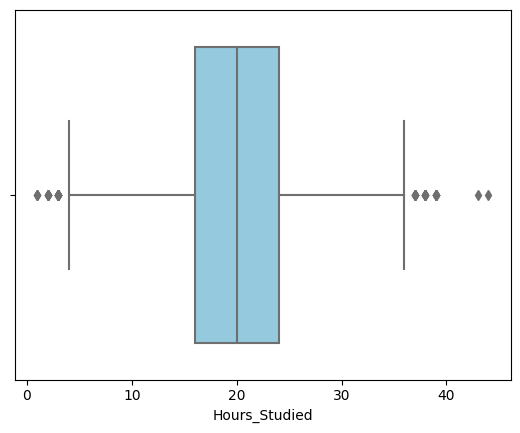

In [ ]:
sns.boxplot(x=df['Hours_Studied'], color='skyblue')
plt.show()

# IQR method
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Hours_Studied'] < (Q1 - 1.5*IQR)) | (df['Hours_Studied'] > (Q3 + 1.5*IQR))]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


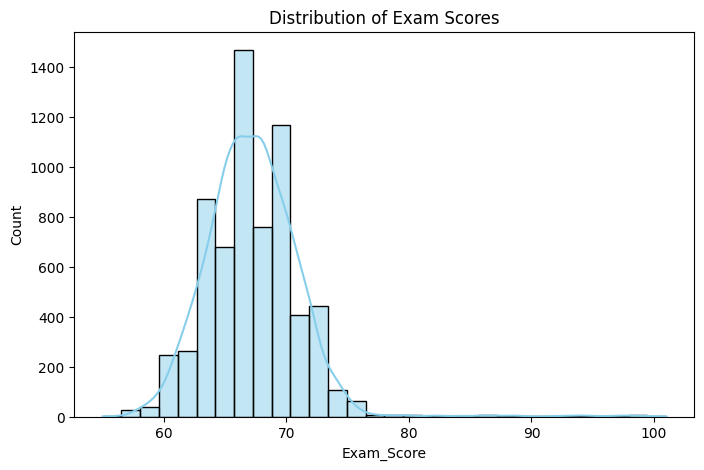

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Exam Scores")
plt.show()


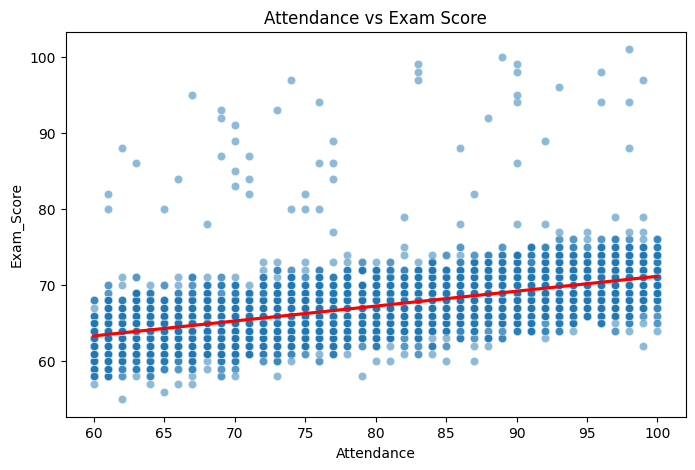

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Attendance", y="Exam_Score", data=df, alpha=0.5)
sns.regplot(x="Attendance", y="Exam_Score", data=df, scatter=False, color="red")
plt.title("Attendance vs Exam Score")
plt.show()


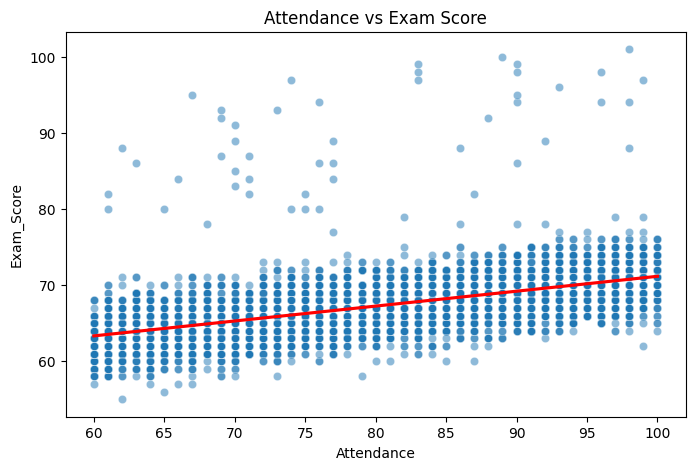

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Attendance", y="Exam_Score", data=df, alpha=0.5)
sns.regplot(x="Attendance", y="Exam_Score", data=df, scatter=False, color="red")
plt.title("Attendance vs Exam Score")
plt.show()


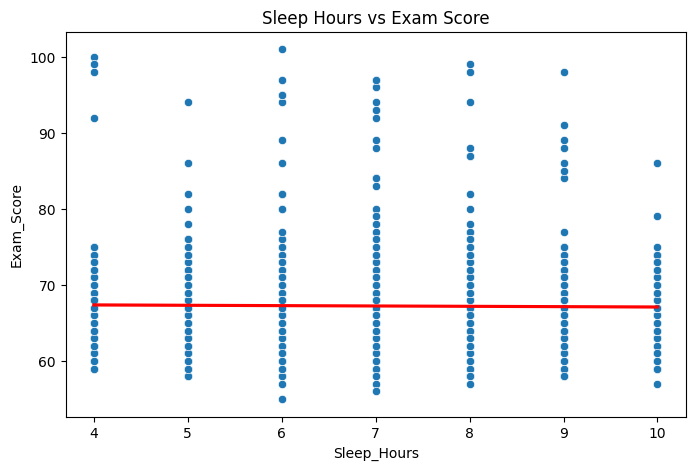

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sleep_Hours", y="Exam_Score", data=df)
sns.regplot(x="Sleep_Hours", y="Exam_Score", data=df, scatter=False, color="red")
plt.title("Sleep Hours vs Exam Score")
plt.show()

### Data Train Test Splitting

In [ ]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Model Building - Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 2.0979817762468675
R² Score: 0.688609482416582


In [ ]:
mape = (abs(y_test - y_pred) / y_test).mean() * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Percentage Error: 1.47%


### Predictions Visualization

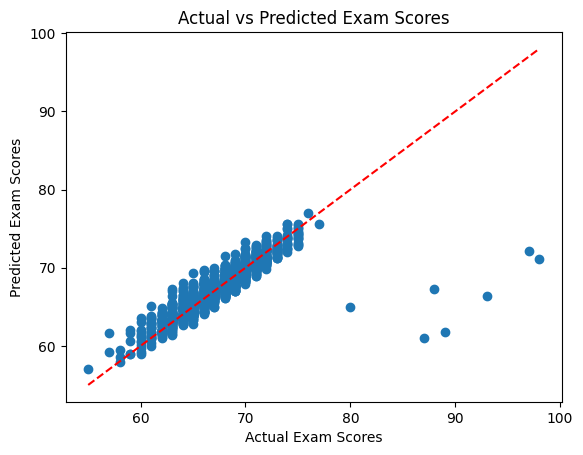

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_train)

print(X_poly[:3])

[[ 1.  8. 64.]
 [ 1.  7. 49.]
 [ 1.  8. 64.]]


In [ ]:
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [ ]:
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

print("Predictions", y_pred)

Predictions [67.16465243 67.16465243 67.25162637 ... 67.25162637 67.25162637
 67.38751507]


In [ ]:
X_curve = np.linspace(0, 10, 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


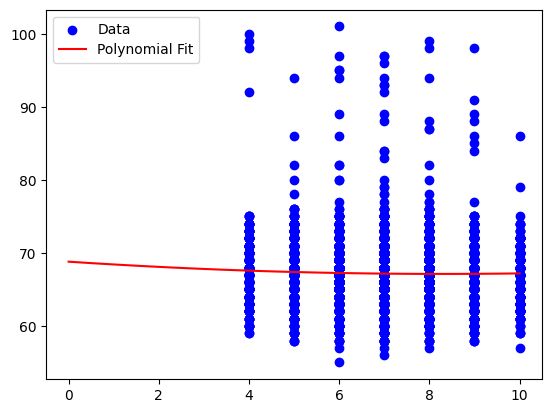

In [ ]:
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_curve, y_curve, color="red", label="Polynomial Fit")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 3.7646643837757807
R²: -0.0026618504776563245
